In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
url = "https://raw.githubusercontent.com/sudhirjangra/decision_tree/main/bank.csv"
df = pd.read_csv(url)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
dummy_df = df.copy()

In [5]:
dummy_df.drop(columns=['contact', 'poutcome', 'day', 'month', 'pdays'], inplace=True)
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,0,yes


In [6]:
# Will decision tree work without encoding?

In [7]:
def preprocessor(df):
    ref_df = df.copy()
    le=LabelEncoder()
    ref_df['job']=le.fit_transform(ref_df['job'])
    ref_df['marital']=le.fit_transform(ref_df['marital'])
    ref_df['education']=le.fit_transform(ref_df['education'])
    ref_df['default']=le.fit_transform(ref_df['default'])
    ref_df['housing']=le.fit_transform(ref_df['housing'])
    ref_df['loan']=le.fit_transform(ref_df['loan'])
    ref_df['deposit']=le.fit_transform(ref_df['deposit'])
    return ref_df

In [8]:
encoded_df = preprocessor(dummy_df)

In [9]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,deposit
0,59,0,1,1,0,2343,1,0,1042,1,0,1
1,56,0,1,1,0,45,0,0,1467,1,0,1
2,41,9,1,1,0,1270,1,0,1389,1,0,1
3,55,7,1,1,0,2476,1,0,579,1,0,1
4,54,0,1,2,0,184,0,0,673,2,0,1


In [10]:
x = encoded_df.drop(['deposit'], axis=1)
y = encoded_df[['deposit']]

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [12]:
xtrain.shape

(8929, 11)

In [13]:
# Model1 Depth=2
model1 = DecisionTreeClassifier(random_state=1, max_depth=2)
model1.fit(xtrain, ytrain)
model1_score_train = model1.score(xtrain, ytrain)
print('Training Score', model1_score_train)

model1_score_test = model1.score(xtest, ytest)
print('Test Score: ', model1_score_test)

Training Score 0.7437562996976145
Test Score:  0.7527989252127183


In [14]:
# Model2 Depth=4
model2 = DecisionTreeClassifier(random_state=1, max_depth=4)
model2.fit(xtrain, ytrain)
model2_score_train = model2.score(xtrain, ytrain)
print('Training Score', model2_score_train)

model2_score_test = model2.score(xtest, ytest)
print('Test Score: ', model2_score_test)

Training Score 0.77365886437451
Test Score:  0.7698163905060457


In [15]:
# Model3 Depth= not defined
model3 = DecisionTreeClassifier(random_state=1)
model3.fit(xtrain, ytrain)
model3_score_train = model3.score(xtrain, ytrain)
print('Training Score', model3_score_train)

model3_score_test = model3.score(xtest, ytest)
print('Test Score: ', model3_score_test)
# overfitting

Training Score 1.0
Test Score:  0.7245857590685177


In [16]:
from sklearn.metrics import classification_report
ypred = model2.predict(xtest)

In [17]:
ytest.value_counts()

,count
deposit,
0,1157
1,1076


In [18]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1157
           1       0.80      0.70      0.75      1076

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [19]:
# Printing the tree

[Text(0.5, 0.8333333333333334, 'duration <= 376.5\ngini = 0.498\nsamples = 8929\nvalue = [4716, 4213]\nclass = 0'),
 Text(0.25, 0.5, 'previous <= 0.5\ngini = 0.432\nsamples = 5899\nvalue = [4039.0, 1860.0]\nclass = 0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.344\nsamples = 4348\nvalue = [3388, 960]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'gini = 0.487\nsamples = 1551\nvalue = [651.0, 900.0]\nclass = 1'),
 Text(0.75, 0.5, 'duration <= 643.5\ngini = 0.347\nsamples = 3030\nvalue = [677, 2353]\nclass = 1'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.434\nsamples = 1520\nvalue = [484, 1036]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.223\nsamples = 1510\nvalue = [193, 1317]\nclass = 1')]

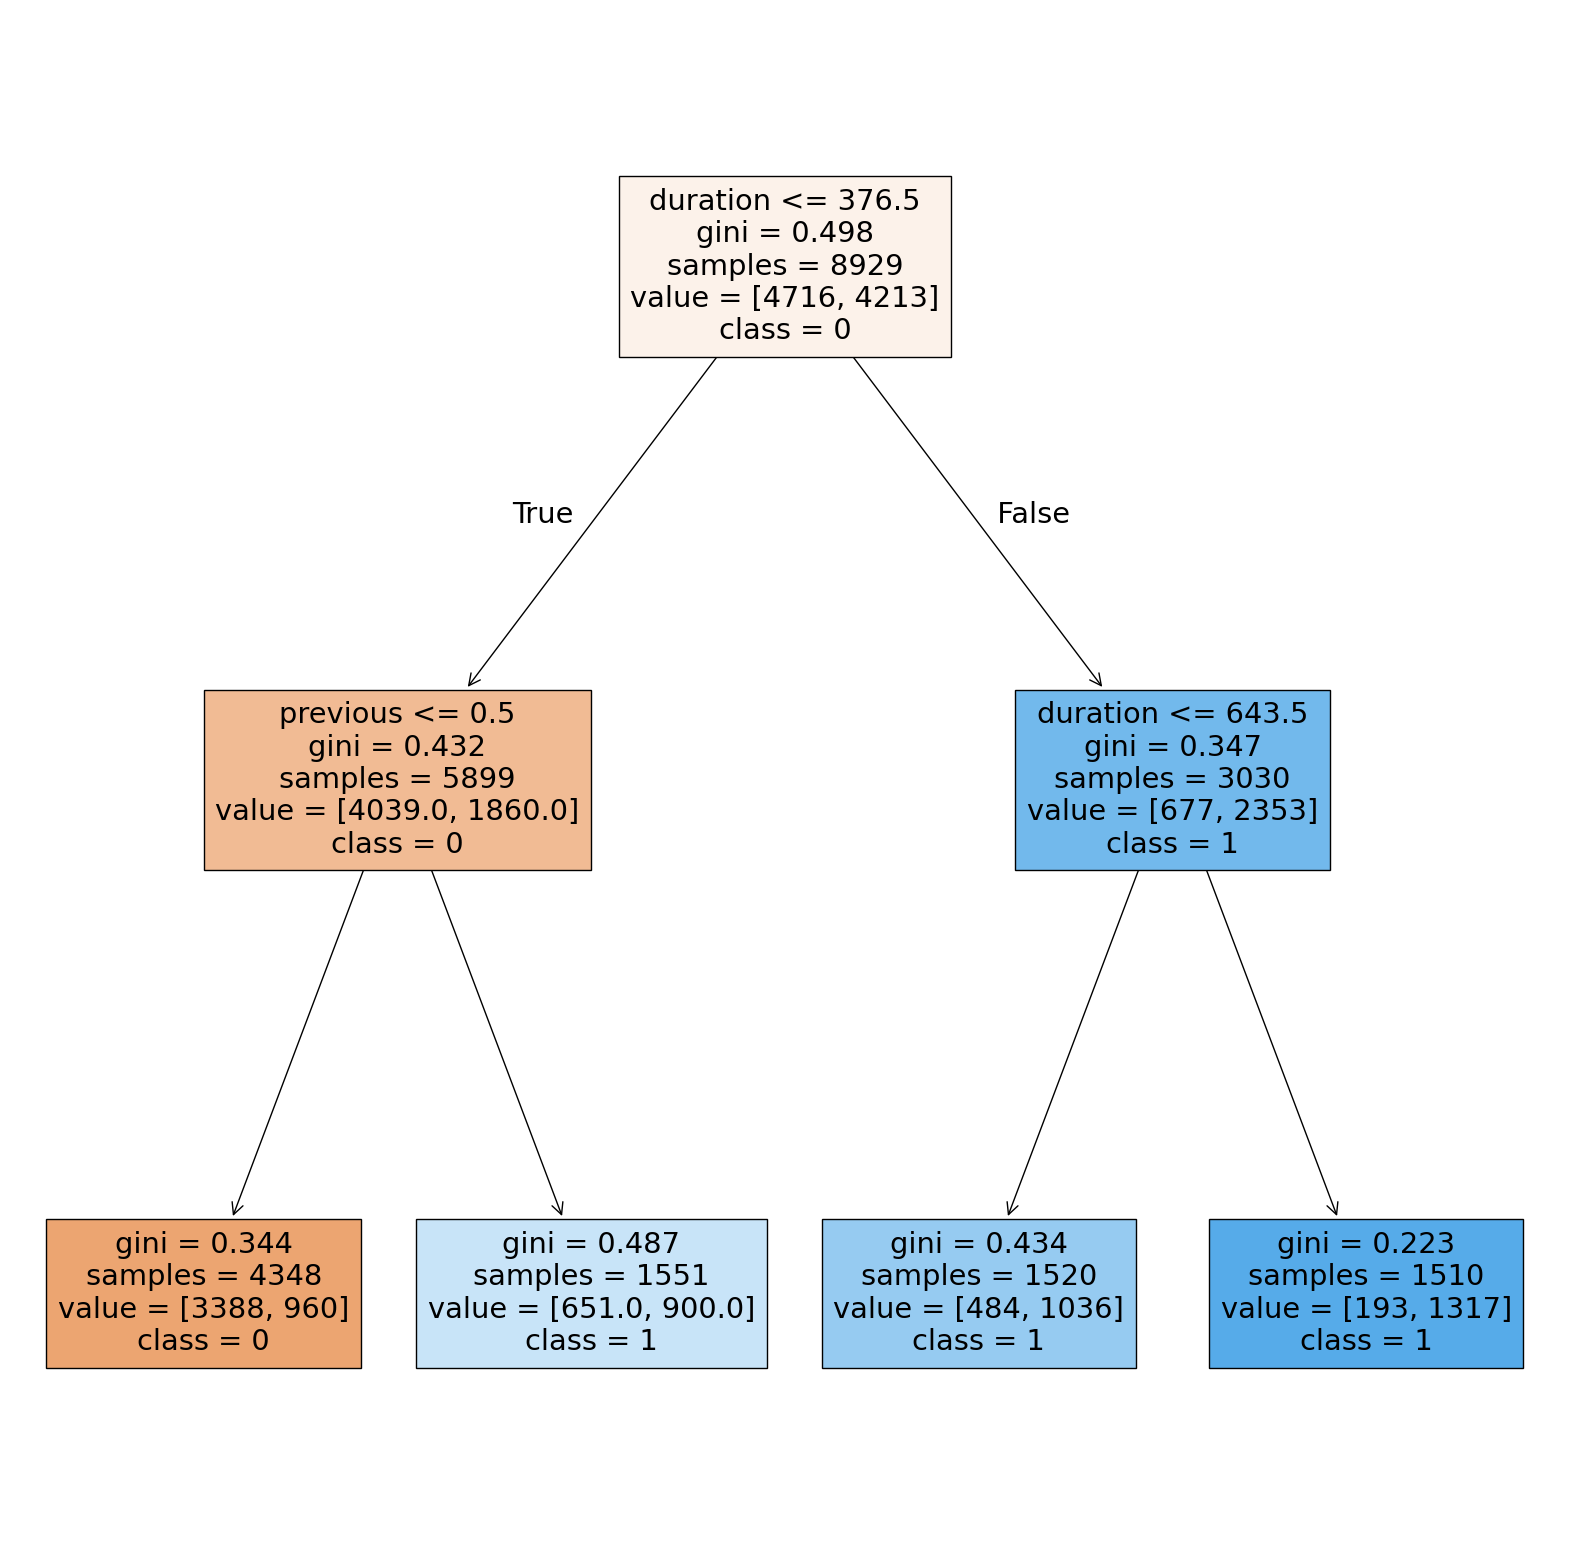

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(model1, filled=True, feature_names=xtrain.columns, class_names=['0','1'])

[Text(0.5, 0.9, 'duration <= 376.5\ngini = 0.498\nsamples = 8929\nvalue = [4716, 4213]\nclass = 0'),
 Text(0.25, 0.7, 'previous <= 0.5\ngini = 0.432\nsamples = 5899\nvalue = [4039.0, 1860.0]\nclass = 0'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'housing <= 0.5\ngini = 0.344\nsamples = 4348\nvalue = [3388, 960]\nclass = 0'),
 Text(0.0625, 0.3, 'duration <= 139.5\ngini = 0.447\nsamples = 2277\nvalue = [1508, 769]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.232\nsamples = 890\nvalue = [771, 119]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.498\nsamples = 1387\nvalue = [737, 650]\nclass = 0'),
 Text(0.1875, 0.3, 'age <= 60.5\ngini = 0.167\nsamples = 2071\nvalue = [1880, 191]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.16\nsamples = 2057\nvalue = [1876, 181]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = 1'),
 Text(0.375, 0.5, 'duration <= 163.5\ngini = 0.487\nsamples = 1551\nvalue = [651.0, 900.0]\nclass = 1'),
 Text(0.3125, 0.3, 'housing <= 0

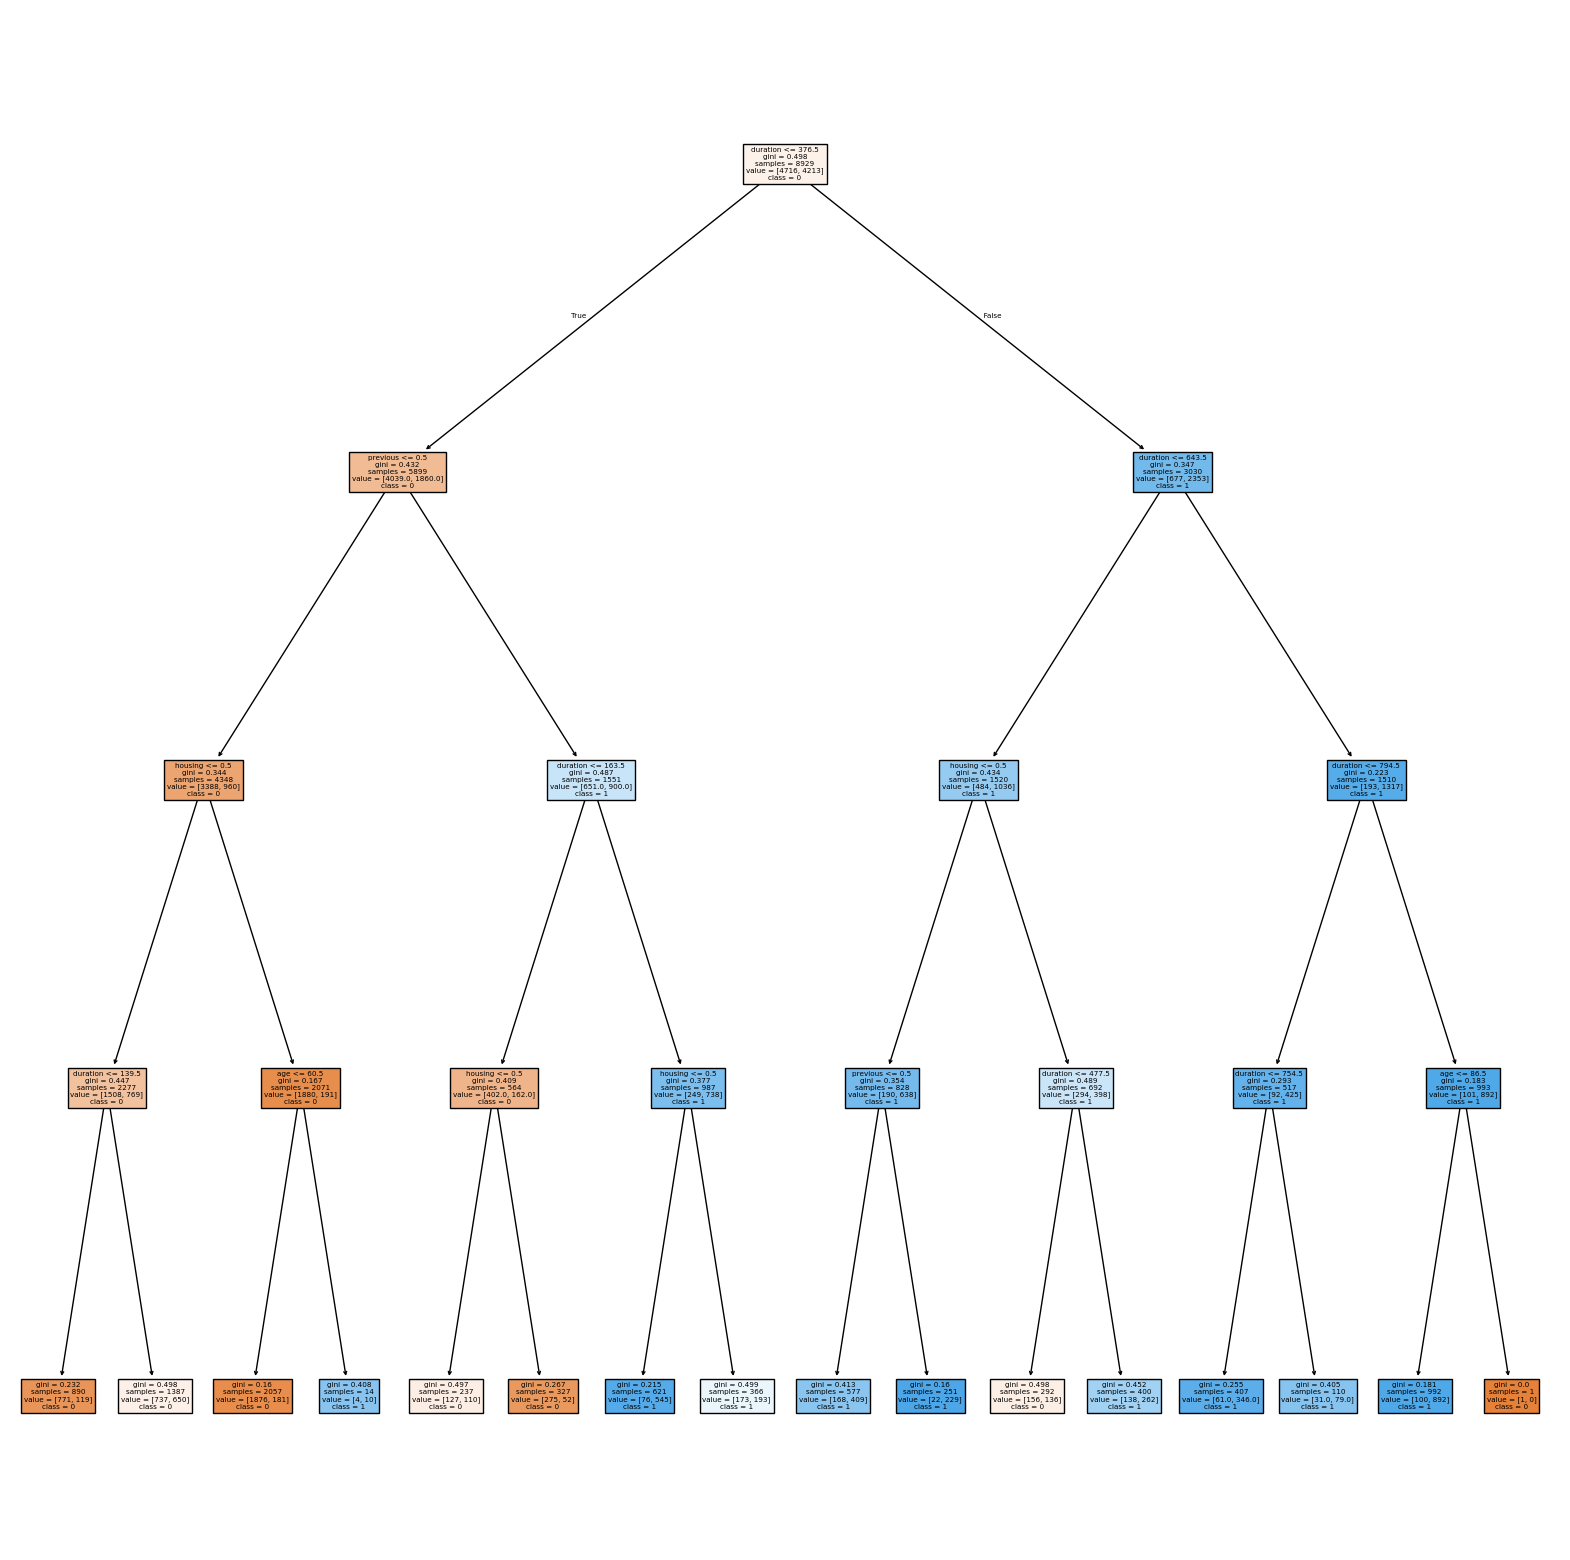

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(model2, filled=True, feature_names=xtrain.columns, class_names=['0','1'])

In [22]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plot_tree(model3, filled=True, feature_names=xtrain.columns, class_names=['0','1'])

# Hyperparameter Tunning

In [23]:
dt = DecisionTreeClassifier()

### Grid Search Cross Validation(CV)

In [24]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[4,6,8],
    'min_samples_leaf':[1,2,3,4,5]
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [27]:
start = time.time()
grid_search.fit(xtrain, ytrain)
end = time.time()
print('Time taken in random search: {0:.2f}'.format(end-start))

Time taken in random search: 2.37


In [28]:
best_param = grid_search.best_params_
best_param

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}

In [29]:
#model4 = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=3, min_samples_split=4)

In [30]:
model4 = DecisionTreeClassifier(**best_param)

In [31]:
model4.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [32]:
ypred_train = model4.predict(xtrain)
ypred_test = model4.predict(xtest)

In [33]:
train_accuracy = accuracy_score(ytrain, ypred_train)
print('Train Accuracy: ', train_accuracy)
test_accuracy = accuracy_score(ytest, ypred_test)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.8014335311905029
Test Accuracy:  0.7850425436632333


In [39]:
# Random Search CV
from scipy.stats import randint
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [43]:
start = time.time()
dt = DecisionTreeClassifier()

param_dist = {
    'criterion':['gini','entropy'],
    'max_depth':randint(2,11), #range from 2 to 10 (exclusive)
    'min_samples_split':randint(2,10), # range from 2 to 10 (exclusive)
    'min_samples_leaf': randint(1,6) # range from 1 to 5 (exclusive)
}

In [44]:
# create the randomized search object
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# fit the randomized search object
random_search.fit(xtrain, ytrain)

# print the best parameters and the best score
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

# use the best parameters to train a new classifier
dt = DecisionTreeClassifier(**random_search.best_params_)
dt.fit(xtrain, ytrain)

# make predictions on the test set
ypred = dt.predict(xtest)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(ytest, ypred)
print('Test accuracy:', accuracy)
end = time.time()
print('Time taken in random search: {0:.2f}'.format(end-start))

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 4}
Best score: 0.7885553056608983
Test accuracy: 0.7828034034930587
Time taken in random search: 4.62


In [45]:
# Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [46]:
ypred_test = model.predict(xtest)

In [47]:
accuracy_score(ytest, ypred_test)

0.7971339005821765

In [49]:
ypred_train = model.predict(xtrain)
acc_train = accuracy_score(ytrain, ypred_train)
print('Train Accuracy: ', acc_train)

Train Accuracy:  1.0


In [48]:
# Hyperparameter Tunning

In [50]:
rf = RandomForestClassifier()

In [65]:
# Grid Search CV
# step 1: Define the grid of parameters
param_grid ={
    'criterion': ['gini', 'entropy'],
    'max_depth':[8,9,10],
    'min_samples_leaf':[1,2,3,4,5],
    'bootstrap': [True, False]
}

In [66]:
from sklearn.model_selection import GridSearchCV
#step 2: create grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
start = time.time()
grid_search.fit(xtrain, ytrain)
end = time.time()
print('Time taken in random search: {0:.2f}'.format(end-start))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Time taken in random search: 61.03


In [68]:
best_param = grid_search.best_params_
best_param

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4}

In [69]:
best_clf = RandomForestClassifier(**best_param)

In [70]:
best_clf.fit(xtrain, ytrain)
ypred_train = best_clf.predict(xtrain)
acc_train = accuracy_score(ytrain, ypred_train)
print('Train Accuracy: ', acc_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy:  0.8514951282338448


In [73]:
best_clf.fit(xtest, ytest)
ypred_test= best_clf.predict(xtest)
acc_test = accuracy_score(ytest, ypred_test)
print('Train Accuracy: ', acc_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy:  0.8799820868786385


In [76]:
# OBB Score
rf_clf = RandomForestClassifier(**best_param, oob_score=True, random_state=42)
rf_clf.fit(xtrain, ytrain)
rf_clf.oob_score_
print('OOB Score: ', rf_clf.oob_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


OOB Score:  0.8093851495128234


In [78]:
# Feature Importance
importance = best_clf.feature_importances_
importance

array([1.07319379e-01, 4.47188873e-02, 1.94817676e-02, 2.71413700e-02,
       4.21127497e-04, 9.99950399e-02, 3.58862582e-02, 1.17588209e-02,
       5.09576587e-01, 3.96065170e-02, 1.04094246e-01])

In [88]:
x.shape[1]

11

In [94]:
column_names = x.columns.tolist()
# Create a list of (importance, column_name) tuples
importance_name_pairs = list(zip(importance, column_names))

# Sort the list by importance in descending order
sorted_importance_name_pairs = sorted(importance_name_pairs, key=lambda x: x[0], reverse=True)

# Print the sorted feature importances
print("Feature Importances (Sorted):")
for importance, col_name in sorted_importance_name_pairs:
  print(f"{col_name}: {importance:.2f}")

Feature Importances (Sorted):
duration: 0.51
age: 0.11
previous: 0.10
balance: 0.10
job: 0.04
campaign: 0.04
housing: 0.04
education: 0.03
marital: 0.02
loan: 0.01
default: 0.00
